# Comparative Analysis of Machine Learning Regression Models on Wine Quality

## By Alex Gillard (Kelowna, British Columbia - Canada)
---


## Problem Statement

There are countless factors as to what influences the overall quality of wine. For the layman introducing themselves to the world of wine tasting, interpreting all these possible factors may be overwhelming at an initial glance. 

Fermentation conditions such as the material, age, and degree of firing to the barrel can greatly influence the flavour that certain wines yield. Additionally, growth conditions such as climate and altitude can significantly influence the acidity of wines. Beginners to wine tasting may have difficulties knowing which attributes to monitor for when choosing the right bottle.

![Wine Production Concepts](https://thumbs.dreamstime.com/b/fermentation-process-background-concept-glowing-13283371.jpg)

**Figure 1:** *Wordcloud illustration of concepts invlolved in wine fermentation, Source: Kheng Guan Toh, Fermentation process background concept glowing, 2023, retrieved from https://www.dreamstime.com/stock-image-fermentation-process-background-concept-glowing-image13283371*

### What is currently being done about this?

In an effort to introduce new wine tasters to this field, countless blogs exist on the internet to attempt explaining what each of the attributes are and how they influence flavour, however there are many resources which fail to provide references or source data for where their information originated.  

### What can be done for improvement? 

To address this issue, the following project will use Machine Learning (ML) - a subfield within Artificial Intelegence (AI) - to effectively set up models capable of making predictions toward which attributes of wine are most relevant to overall quality. This project introduces beginner wine tasters to using ML as a tool to make well informed decisions on their choices of wines. 

### Project Goals

This project aims to simultaneously introduce readers to ML analysis using two distinct models while providing insight into attributes which are the most influential towards the quality of wine through the use of popular data science libraries from Python such as Pandas, Seaborn, and Scikit-Learn. This will be achieved through demonstration of common steps involved in analysis of ML data such as pre-processing data, training ML models, along with evaluation and comparison between the two distinct models.

### Methodology

Throughout this project we will prepare a well-known dataset from Kaggle containing variables from physicochemical tests of wine and quality scores for input to the two following ML models in order of increasing complexity:

1. Decision Tree Regression
2. Random Forest Regression

Following analysis, each of these models will be compared based on their Mean Absolute Error (MAE) and Root Mean Square Error (RMSE) scores to determine which of the two models most effectively predict indicators of wine quality. 

### Hypothesis

The Random Forest Regression model will give rise to the lowest RMSE and MAE scores in comparison to the Decision Tree Regression model.

---

## Outline:


### 1. **Problem Statement**


### 2. **Data Exploration**


### 3. **Data Pre-Processing**


### 4. **Feature Selection**


### 5. **Model Selection**


### 6. **Model Training**


### 7. **Model Evaluation**


### 8. **Model Comparison**


### 9. **Conclusion**

---


# Data Exploration

The [Wine Quality Dataset](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset) will be used throughout this project. This data originates from the following [study](https://www.semanticscholar.org/paper/Modeling-wine-preferences-by-data-mining-from-Cortez-Cerdeira/bf15a0ccc14ac1deb5cea570c870389c16be019c) concerning evaluation of the Portuguese *Vinho Verde* wine variety. We will first begin the process of data exploration.

In [230]:
## Libraries for Data Pre-Processing

import pandas as pd
import numpy as np

## Libraries for Visualization

import matplotlib.pyplot as plt
import seaborn as sns

## Libraries for Statistical Testing

import scipy.stats as stats

## Libraries for Machine Learning

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

## Libraries for ML metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [231]:
## Importing the Wine Quality dataset

df = pd.read_csv('WineQT.csv')

In [232]:
## Viewing first five observations of WineQT Data

df.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [233]:
## Observing datatypes

df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [234]:
## Counting number of Observations (rows) and Attributes (columns)

print('Number of Observations: ', df.shape[0])
print('Number of Attributes: ', df.shape[1])

Number of Observations:  1143
Number of Attributes:  13


In [235]:
## Generating summary statistics

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


According to Table 1. from the [Cortez *et. al.*](https://www.semanticscholar.org/paper/Modeling-wine-preferences-by-data-mining-from-Cortez-Cerdeira/bf15a0ccc14ac1deb5cea570c870389c16be019c) study

Each attribute has the following units:

- Fixed Acidity (g(tartaric acid)/dm<sup>3</sup>)
- Volatile Acidity (g(acetic acid)/dm<sup>3</sup>)
- Citric Acid (g/dm<sup>3</sup>)
- Chlorides (g(sodium chloride)/dm<sup>3</sup>)
- Free Sulfur Dioxide (mg/dm<sup>3</sup>)
- Total Sulfur dioxide (mg/dm<sup>3</sup>)
- Density (g/cm<sup>3</sup>)
- pH
- Sulphates (g/(potassium sulphate)/dm<sup>3</sup>)
- Alcohol (vol.%)

# Data Preprocessing

In [236]:
## Cleaning Data

# Finding missing values

miss_val = df.isnull().sum()
print(miss_val)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [237]:
## Finding duplicates

duplicates = df.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
1138    False
1139    False
1140    False
1141    False
1142    False
Length: 1143, dtype: bool


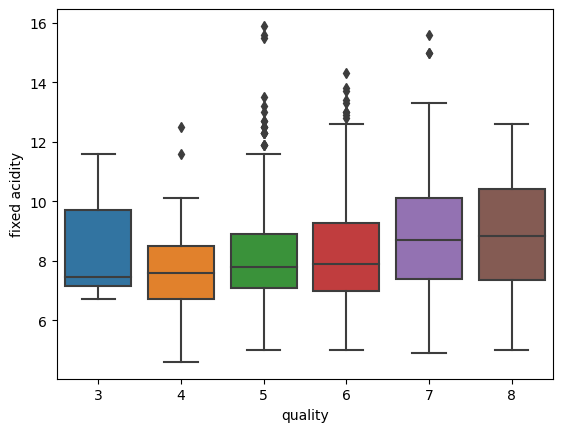

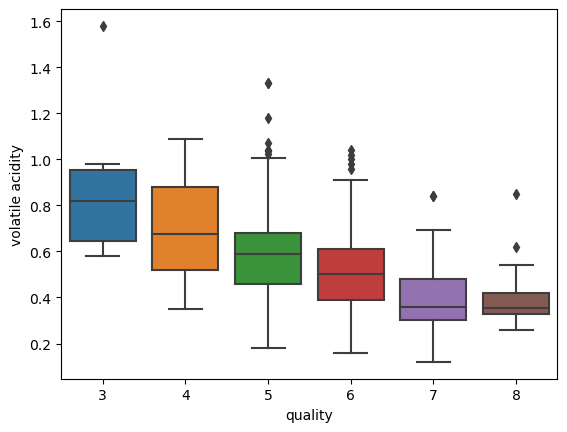

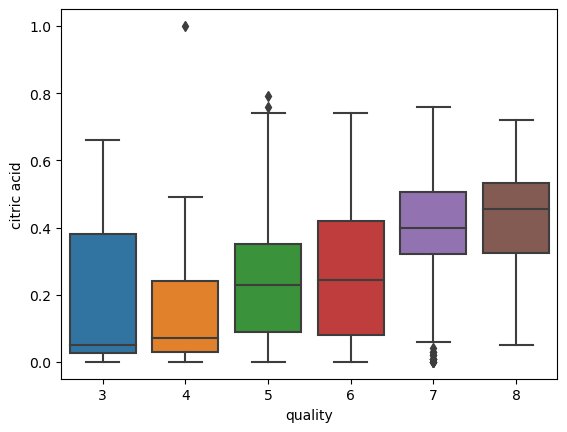

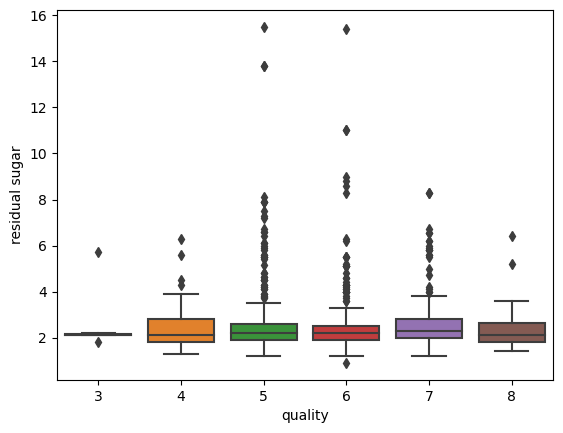

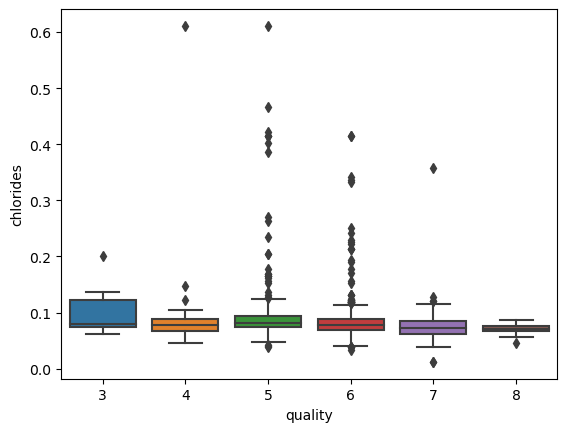

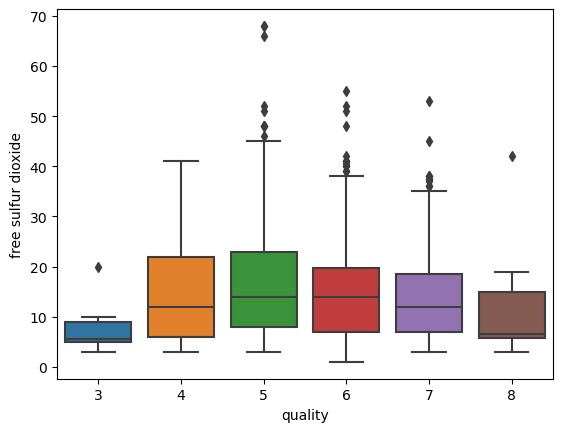

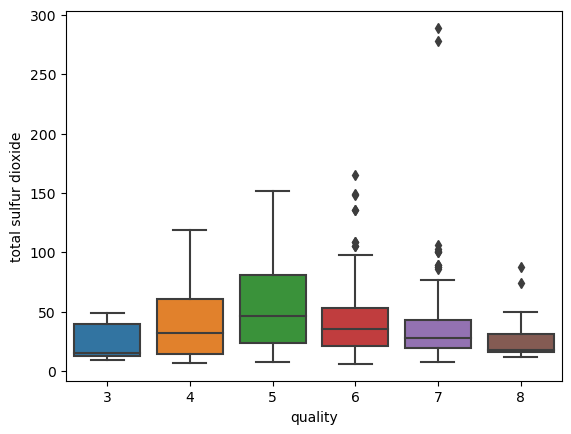

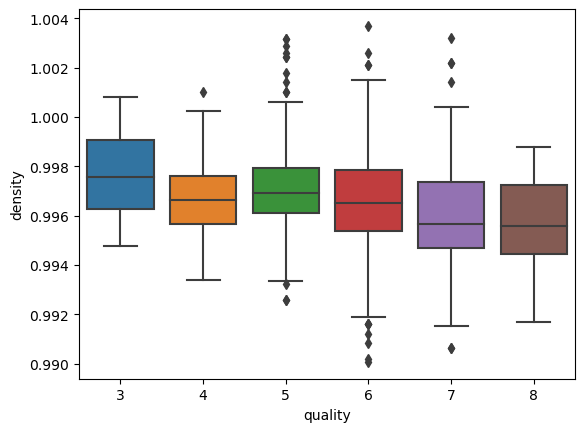

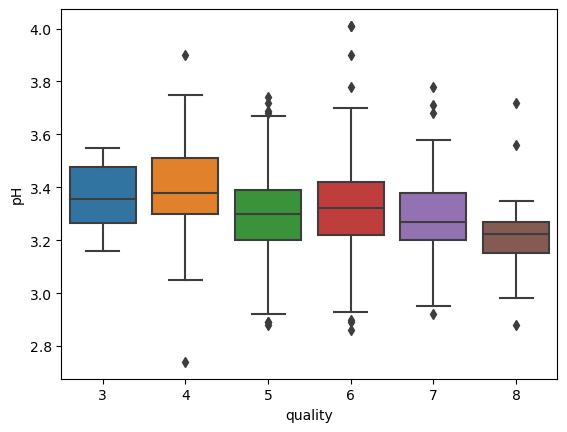

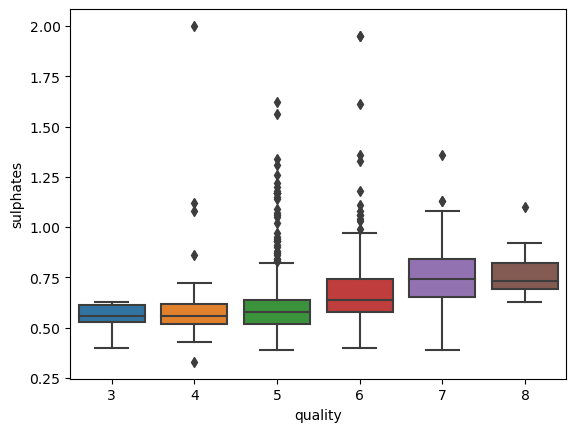

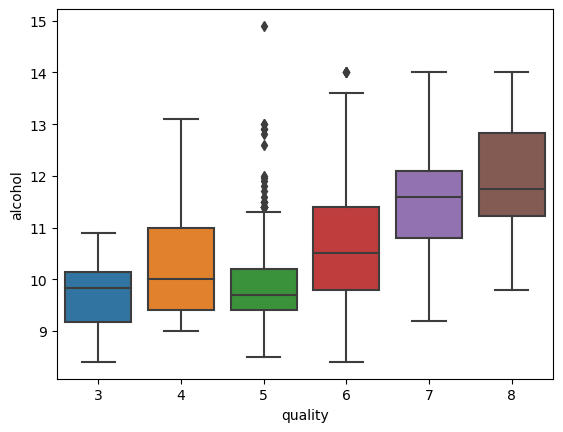

In [238]:
## Displaying box plots for each attribute to examine presence of outliers
# Store attributes in a list, excluding quality

wine_attributes = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

# Generate box plots for each attribute against the quality score
for attribute in wine_attributes:
    sns.boxplot(data=df, x='quality', y=attribute)
    plt.show()    

**Figure 2:** Box Plots corresponding to wine attributes compared against wine quality score

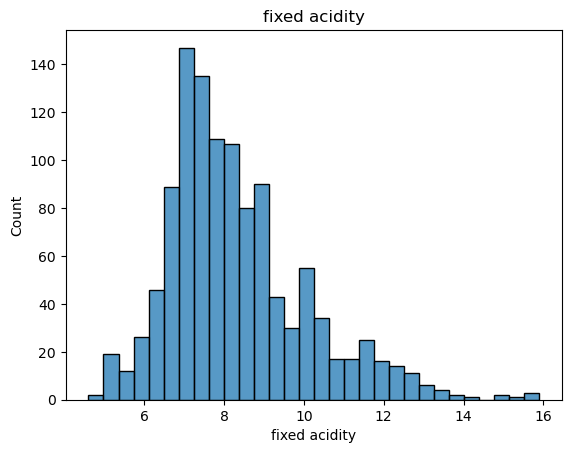

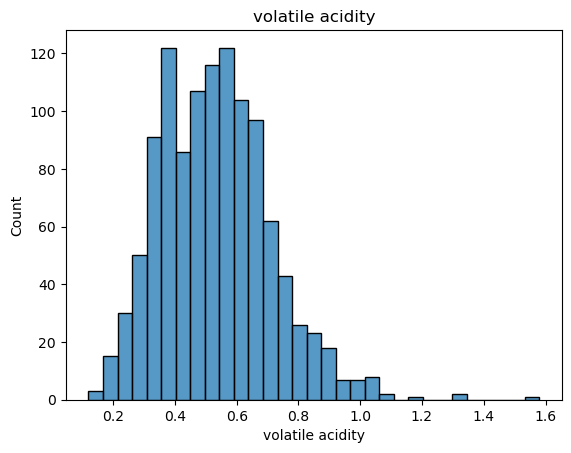

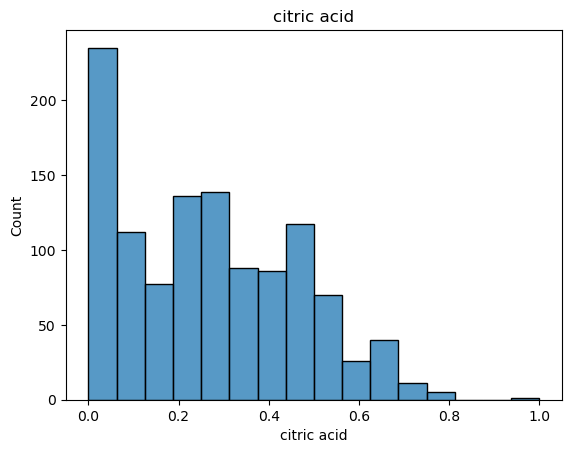

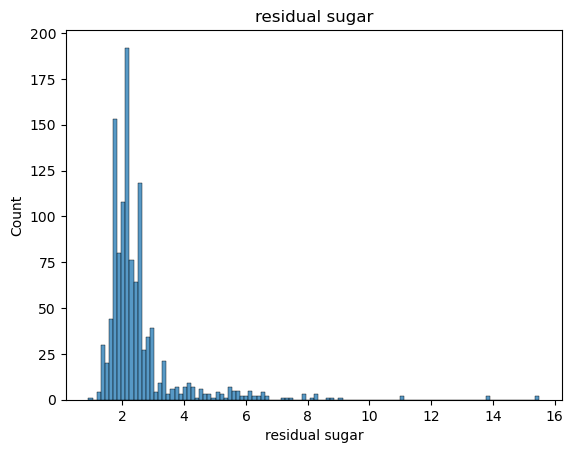

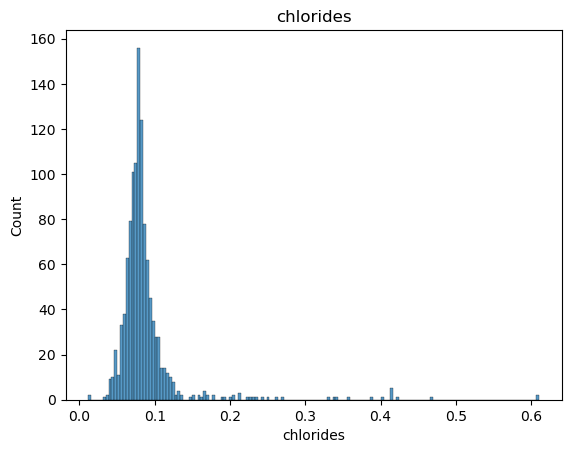

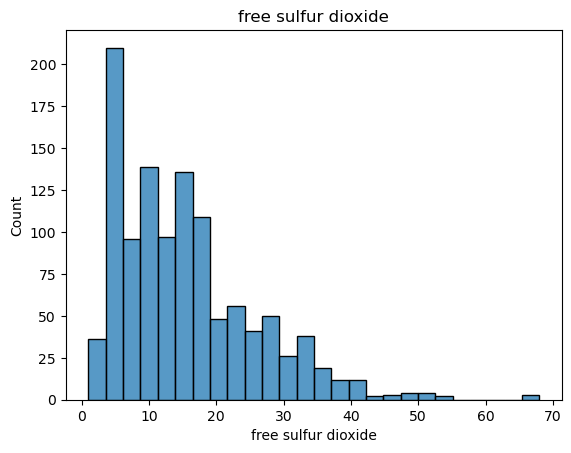

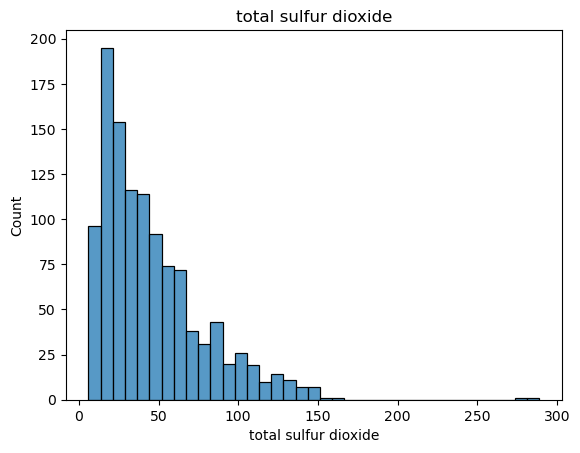

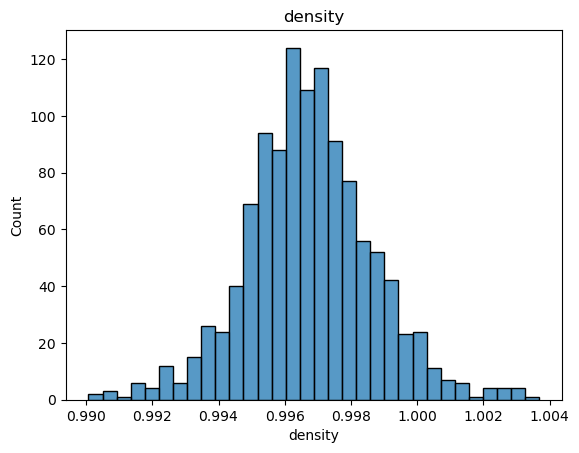

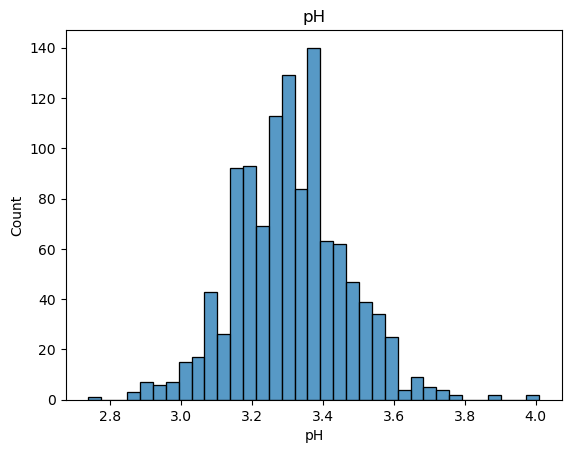

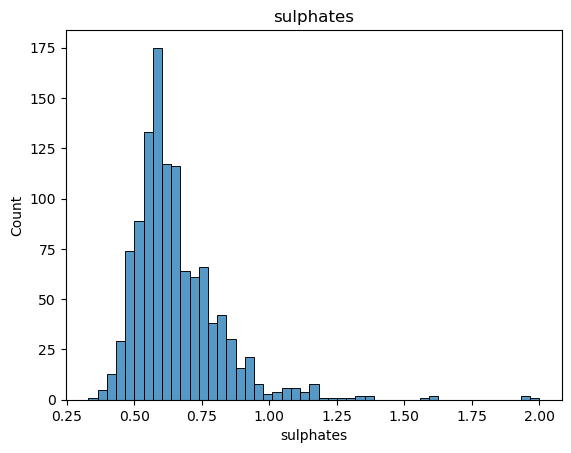

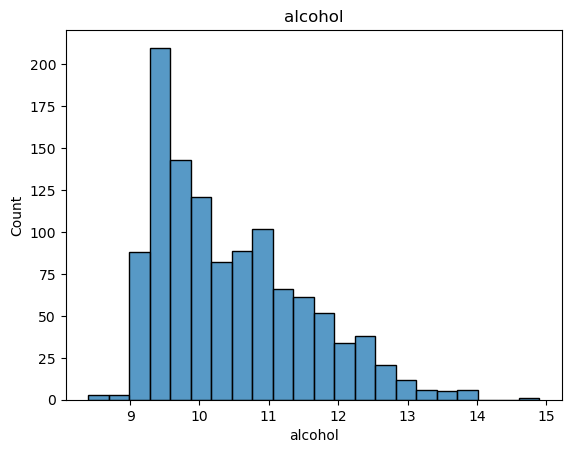

In [239]:
for att in wine_attributes:
    sns.histplot(df[att])
    plt.title(att)
    plt.show()

**Figure 3:** Histograms corresponding to the frequency distribution of wine attributes. 

Because we are comparing continuous variables (fixed acidity, residual sugar, citric acid content, etc.) against the categorical quality score, it is appropriate to examine the box plots and histograms of each wine attribtue against the quality score. 

**Based on the visual observations of the box plots we can conclude the following:**

- The data has many outliers suggested by placement of datapoints above and below the box whiskers.

**Based on the visual observations of the histogram we can conclude:** 

- Right-skewness is seen with most attributes except for pH and density which approximately display symmetrical distributions 

We will now test the dataset for skewness using the [skew() function](https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de) from [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.skew.html). The following should be considered:
- Skew values > 1 are right-skewed
- Skew values < -1 are left-skewed

In [240]:
for att in wine_attributes:
    skew = df[att].skew()
    print(f"Attribute: {att} \n Skewness: {skew}")
    if skew > 1:
        print(f"{att} is right-skewed")
    elif skew < -1:
        print(f"{att} is left-skewed")
    else:
        print(f"{att} is approximately symmetrical")

Attribute: fixed acidity 
 Skewness: 1.0449299563724053
fixed acidity is right-skewed
Attribute: volatile acidity 
 Skewness: 0.6815474143781255
volatile acidity is approximately symmetrical
Attribute: citric acid 
 Skewness: 0.3715607833706083
citric acid is approximately symmetrical
Attribute: residual sugar 
 Skewness: 4.361096404323471
residual sugar is right-skewed
Attribute: chlorides 
 Skewness: 6.026360154399587
chlorides is right-skewed
Attribute: free sulfur dioxide 
 Skewness: 1.2312611567075427
free sulfur dioxide is right-skewed
Attribute: total sulfur dioxide 
 Skewness: 1.6657660141342994
total sulfur dioxide is right-skewed
Attribute: density 
 Skewness: 0.102395108720599
density is approximately symmetrical
Attribute: pH 
 Skewness: 0.22113839209685748
pH is approximately symmetrical
Attribute: sulphates 
 Skewness: 2.497266051332364
sulphates is right-skewed
Attribute: alcohol 
 Skewness: 0.8633132317223615
alcohol is approximately symmetrical


Based on the output of the **skew()** function we observe the following:
- fixed acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, and sulphates exhibit right-skewness.
- volatile acidity, citric acid, density, pH, and alcohol exhibit approximately symmetrical distributions.

We will now separate the wine attributes into two separate datasets based on their skewness, where the suffix *"RS"* refers to right-skew distributions and the suffix *"SYM"* refers to approximately symmetrical distributions

In [241]:
## Splitting current data frame into two data frames based on skewness

# Right-skewed data
wine_att_RS = ['fixed acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'quality']

# Approximately symmetrical data
wine_att_SYM = ['volatile acidity', 'citric acid', 'density', 'pH', 'alcohol', 'quality']

df_RS = df[wine_att_RS]
df_SYM = df[wine_att_SYM]


For the right-skewed dataset, we will apply a log-transformation in an attempt to normalize these values. First we will ensure there are non-zero values within the dataset, adding constants otherwise.

In [242]:
# Checking the dataframe for any 0 values prior to log-transformation

if (df_RS == 0).any().any():
    print("This dataframe contains zero values")
else:
    print("This dataframe contains non-zero values")

This dataframe contains non-zero values


Looks like the data frame does not contain any zero values. This means we are clear to proceed with log transformation!

In [243]:
df_LT = np.log(df_RS)

print(df_LT)

      fixed acidity  residual sugar  chlorides  free sulfur dioxide  \
0          2.001480        0.641854  -2.577022             2.397895   
1          2.054124        0.955511  -2.322788             3.218876   
2          2.054124        0.832909  -2.385967             2.708050   
3          2.415914        0.641854  -2.590267             2.833213   
4          2.001480        0.641854  -2.577022             2.397895   
...             ...             ...        ...                  ...   
1138       1.840550        0.832909  -2.577022             3.367296   
1139       1.916923        0.641854  -2.688248             3.332205   
1140       1.824549        0.693147  -2.407946             3.465736   
1141       1.774952        0.788457  -2.780621             3.663562   
1142       1.774952        0.693147  -2.590267             3.465736   

      total sulfur dioxide  sulphates   quality  
0                 3.526361  -0.579818  1.609438  
1                 4.204693  -0.385662  1.609438

The data has been transformed successfully. We will now compare histograms for the right skewed dataset before and after the log transformation.

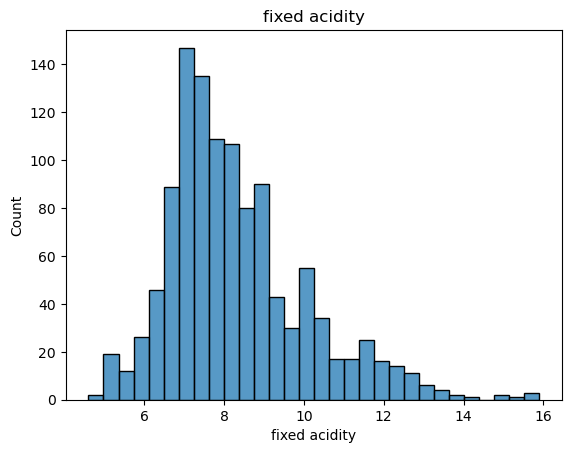

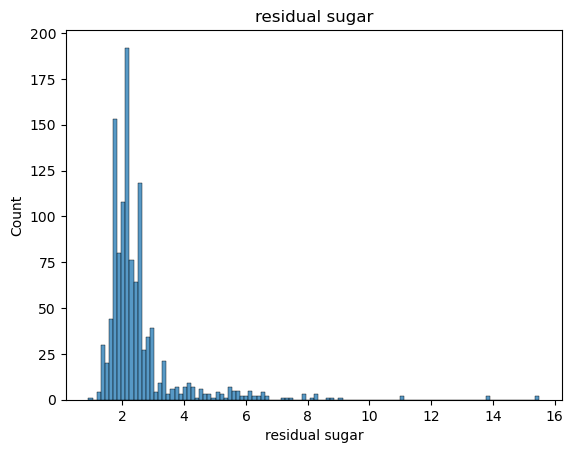

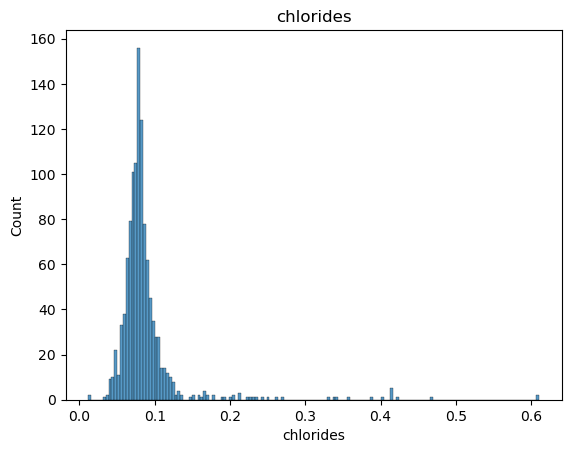

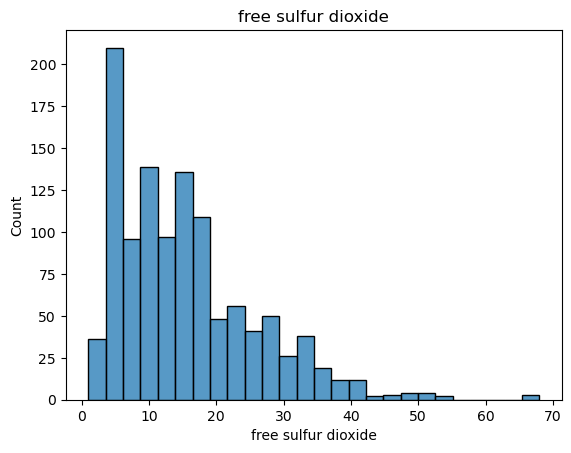

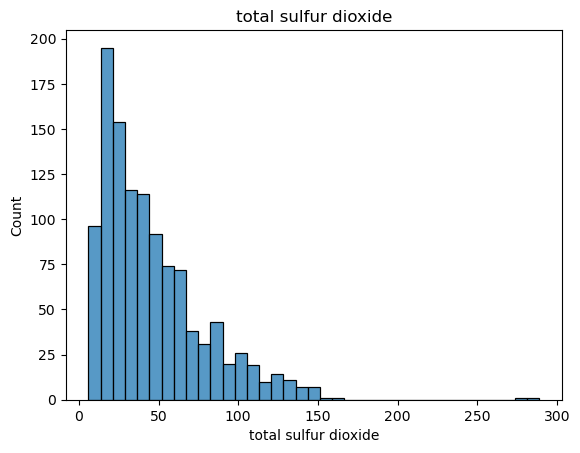

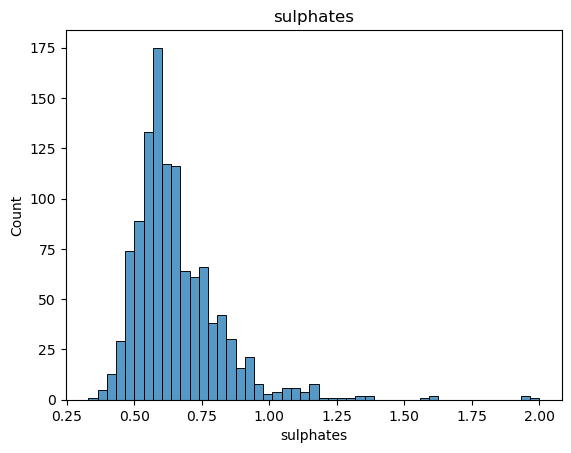

In [244]:
## Before log transformation (excluding the distribution of the quality score) -- See Figure 3.
# Note that wine_att_RS is a list which still holds the same column names regardless of transformation; hence, why this variable is being re-used.

for att in wine_att_RS[:-1]:
    sns.histplot(df_RS[att])
    plt.title(att)
    plt.show()

**Figure 4:** Frequency distributions of right-skewed wine attributes before log-transformation.

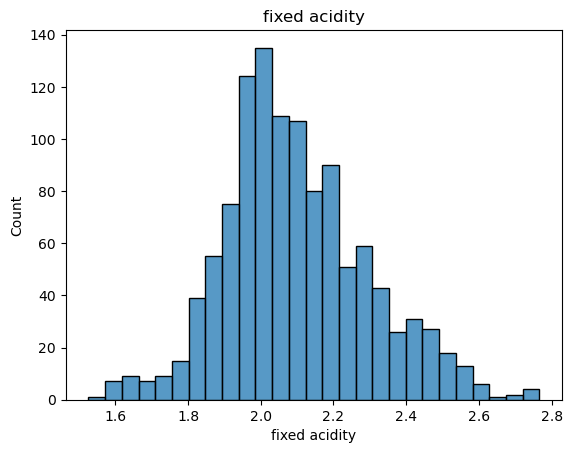

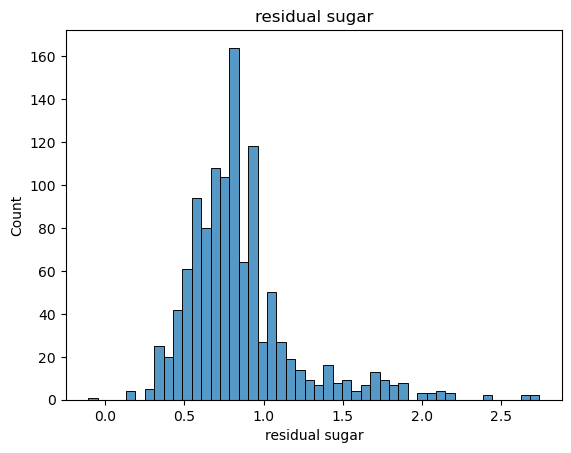

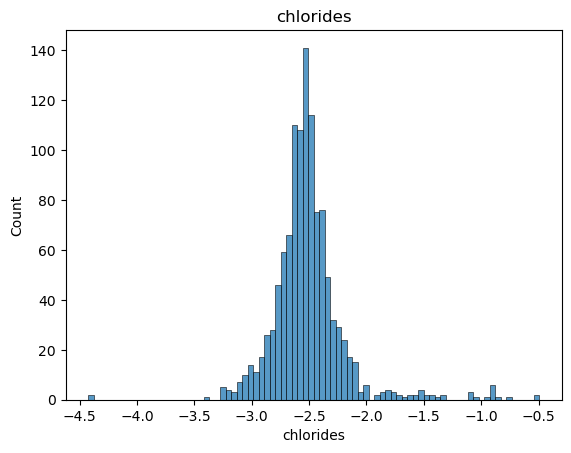

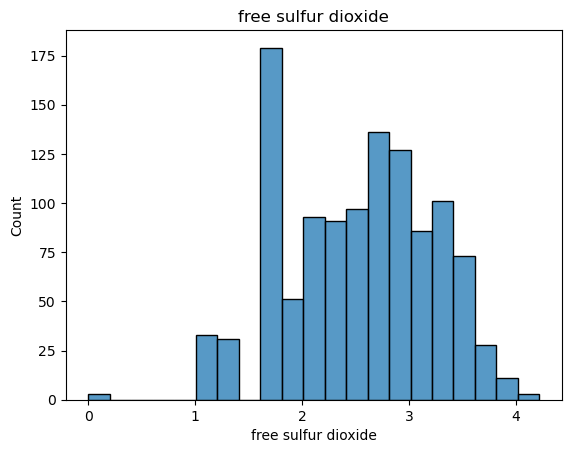

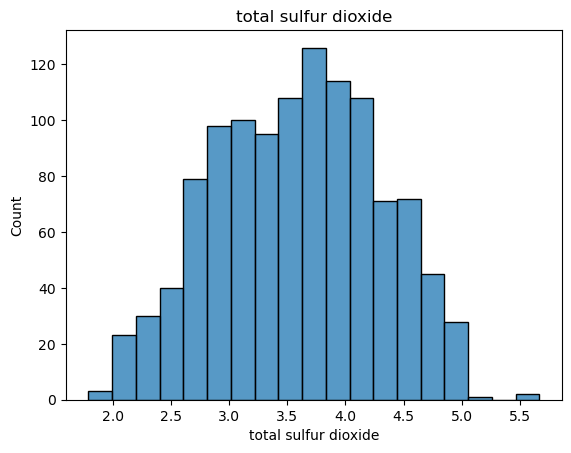

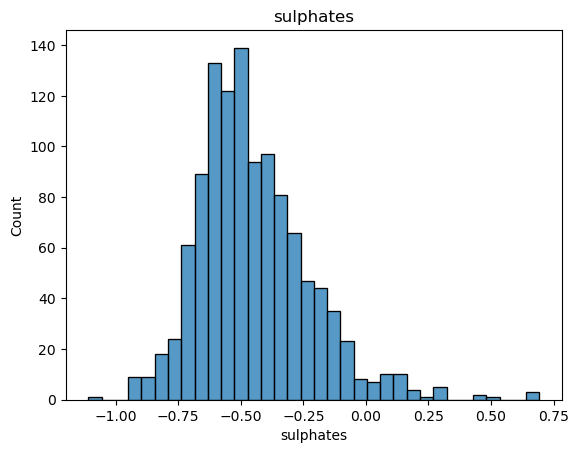

In [245]:
## After log transformation (excluding the distribution of the quality score)

for att in wine_att_RS[:-1]:
    sns.histplot(df_LT[att])
    plt.title(att)
    plt.show()

**Figure 5:** Frequency distributions of right-skewed wine attributes after log-transformation

To check each data frame is normally distributed, we will use both quantile-quantile (Q-Q) plots and the Shapiro-Wilk test.

For the following test we will define the null and alternative hypothesis, respectively:

- H<sub>0</sub>: The data follows a normal distribution
- H<sub>1</sub>: The data does not follow a normal distribution

Our significance level ($\alpha$) also will be set as 0.05 (95% CI)


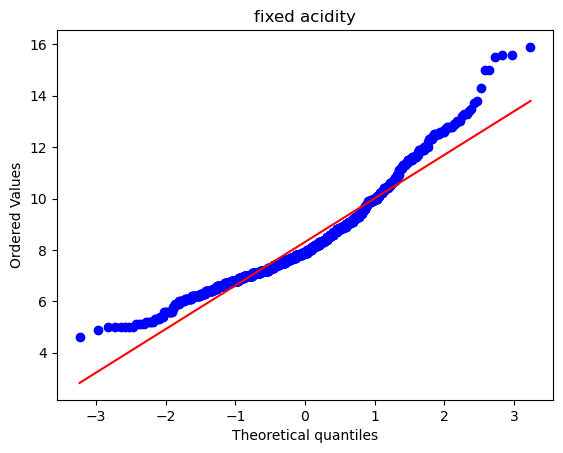

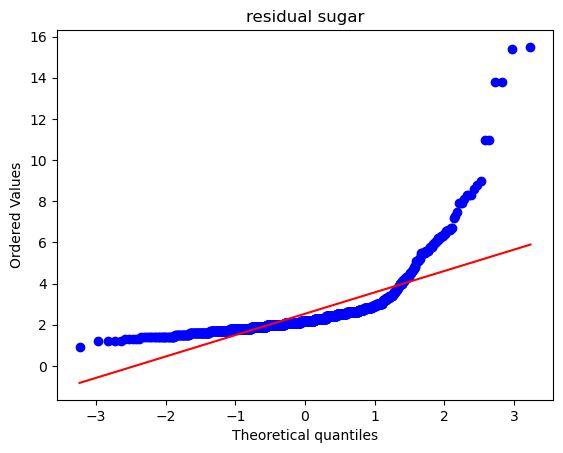

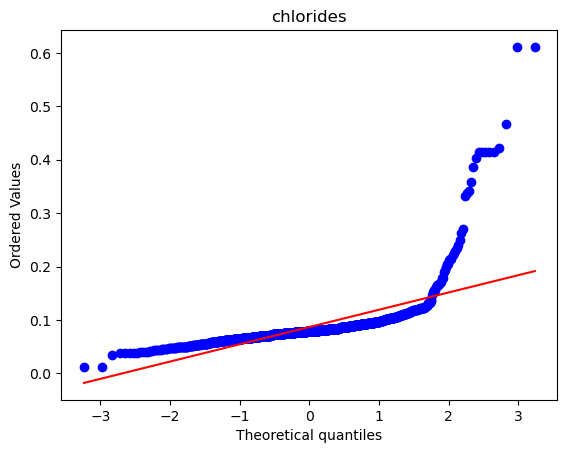

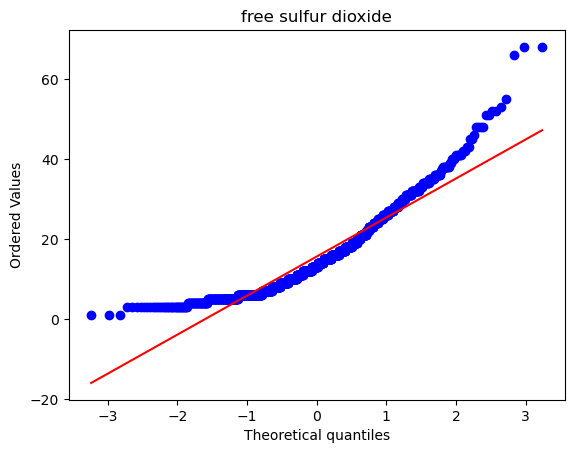

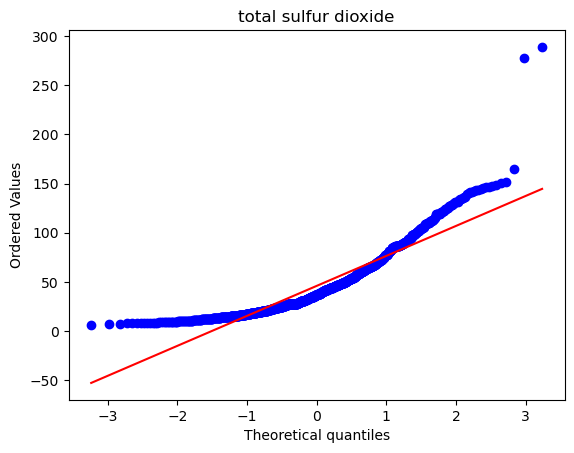

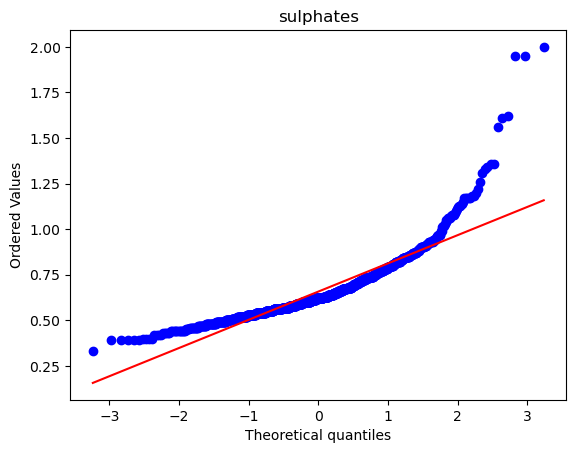

In [246]:
## Comparing Q-Q plots before and after transformation

## Before transformation

for att in wine_att_RS[:-1]:
    stats.probplot(df_RS[att], dist="norm", plot=plt)
    plt.title(att)
    plt.show()

**Figure 6:** Quantile-quantile plots of the right-skewed wine attributes before log-transformation

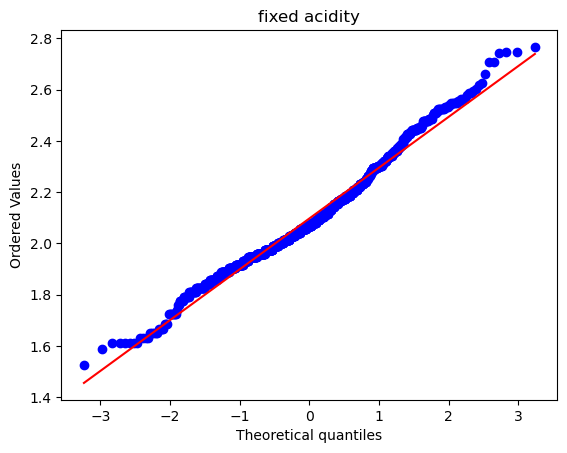

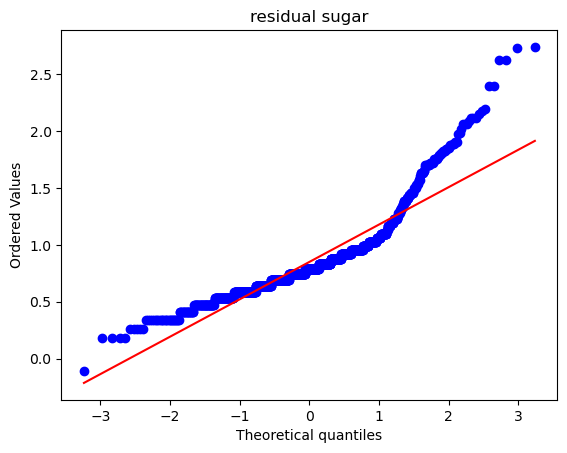

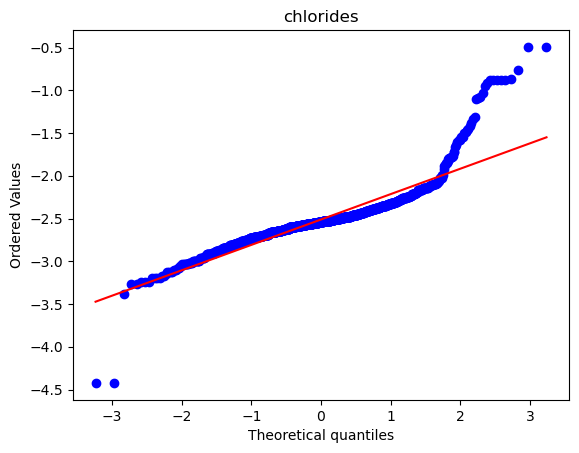

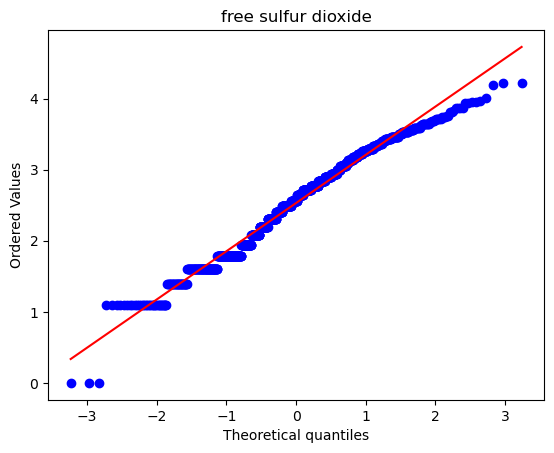

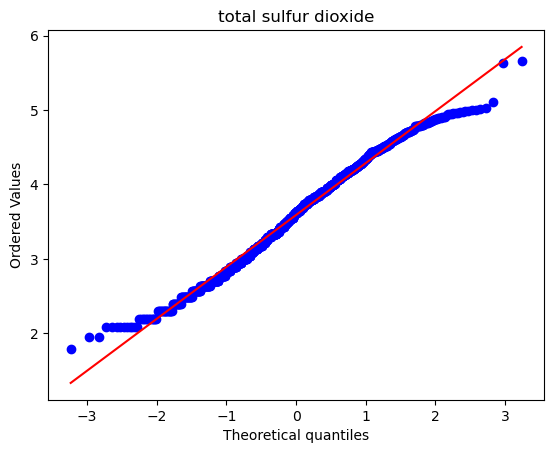

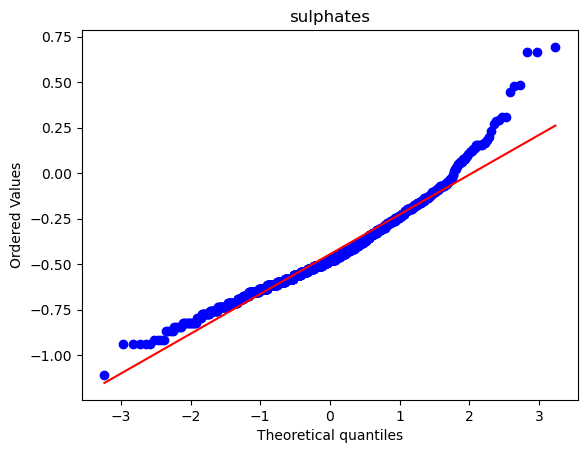

In [247]:
## After transformation

for att in wine_att_RS[:-1]:
    stats.probplot(df_LT[att], dist="norm", plot=plt)
    plt.title(att)
    plt.show()  

**Figure 7:** Quantile-quantile plots of the right-skewed wine attributes after log-transformation

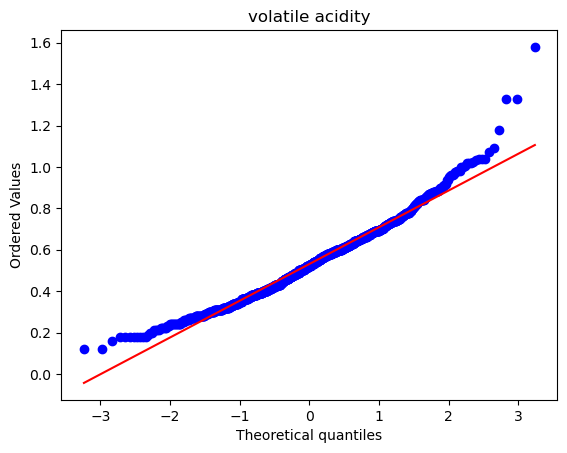

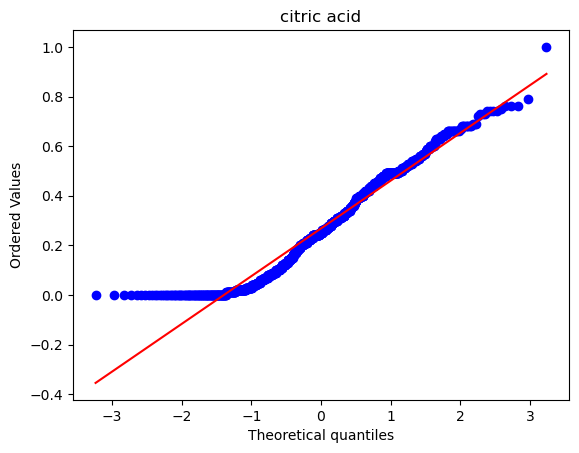

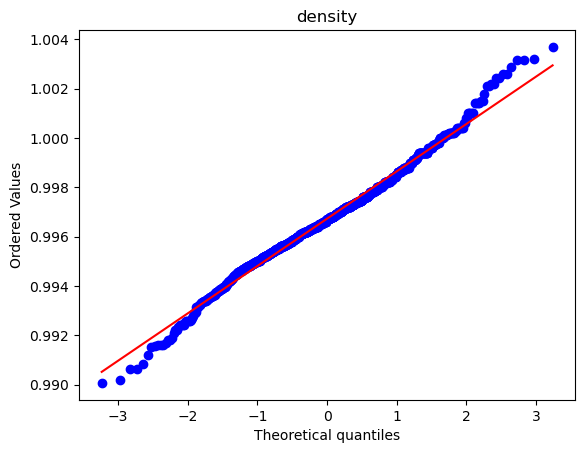

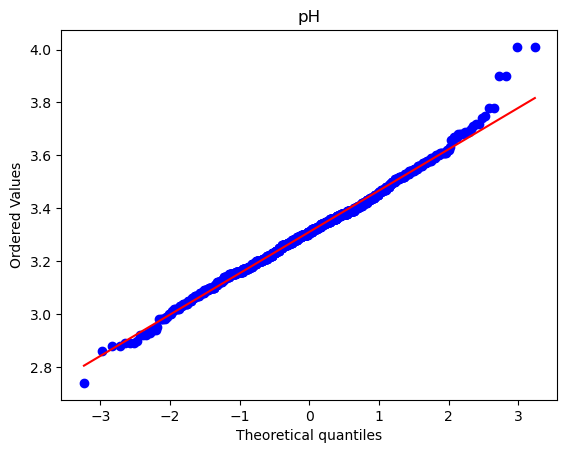

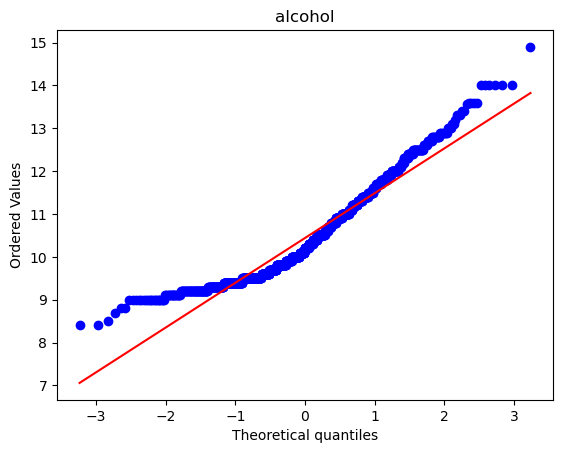

In [248]:
## Testing symmetrical values

for att in wine_att_SYM[:-1]:
    stats.probplot(df_SYM[att], dist="norm", plot=plt)
    plt.title(att)
    plt.show()  

**Figure 8:** Quantile-quantile plots of the approximately symmetrically distributed wine attributes

In [249]:
## Set column_data to a 1D array
for column in df_LT.columns:
    column_data = df_LT[column]
    ## Perform a Shapiro-Wilk Test with the column data
    shapiro_test = stats.shapiro(column_data)
    print(f"Test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}")
## Displaying column names     
for i in range(7):
    print(f"Column {i}: {df_LT.columns[i]}")

Test statistic: 0.9830595850944519, p-value: 2.8049063072188574e-10
Test statistic: 0.8605114221572876, p-value: 1.1719204718375955e-30
Test statistic: 0.8240606784820557, p-value: 1.2613323462326888e-33
Test statistic: 0.9825970530509949, p-value: 1.8274867730205813e-10
Test statistic: 0.9896429181098938, p-value: 3.246320261496294e-07
Test statistic: 0.9538971185684204, p-value: 1.7529555706532415e-18
Test statistic: 0.8487263917922974, p-value: 1.1177046975471622e-31
Column 0: fixed acidity
Column 1: residual sugar
Column 2: chlorides
Column 3: free sulfur dioxide
Column 4: total sulfur dioxide
Column 5: sulphates
Column 6: quality


In [250]:
## Set column_data to a 1D array
for column in df_SYM.columns:
    column_data = df_SYM[column]
    ## Perform a Shapiro-Wilk Test with the column data
    shapiro_test = stats.shapiro(column_data)
    print(f"Test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}")
## Displaying column names     
for i in range(6):
    print(f"Column {i}: {df_SYM.columns[i]}")

Test statistic: 0.9742149114608765, p-value: 2.1307489193184148e-13
Test statistic: 0.9532217979431152, p-value: 1.273572249032449e-18
Test statistic: 0.9906984567642212, p-value: 1.2488301308621885e-06
Test statistic: 0.9921150207519531, p-value: 8.658012120577041e-06
Test statistic: 0.9289467334747314, p-value: 7.515898149130881e-23
Test statistic: 0.8547005653381348, p-value: 3.61023655476521e-31
Column 0: volatile acidity
Column 1: citric acid
Column 2: density
Column 3: pH
Column 4: alcohol
Column 5: quality


After plotting the Q-Q plots of each wine attribute in conjunction with performing Shapiro-Wilk tests, the following can be concluded: 
-  There is sufficient evidence to reject the null hypothesis

Moreover, we have sufficient evidence to state that the following data does not follow a normal distribuiton. 

# Feature Selection

We will now examine the results of several wine consumer studies to better understand the most relevent attributes towards wine quality:

- A wine business study from [Maduerira et. al.](https://www.emerald.com/insight/content/doi/10.1108/17511061311317318/full/html) focusing on Portuguese consumer prefrerences of wine discovered that *flavour* and *aroma* positively influence consumers in contrast to *alcohol* and *gas* content which negatively influenced the involvement of consumers. 

- [Coutinho et. al.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7230440/) conducted a wine tasting where a range of consumers (n = 104) participated in tasting a variety of fine-wines from Portugal. During the wine tasting, consumers were prompted to complete a, "Check-All-That-Apply" (CATA) test to associate emotionally descriptive terms with features of each wine sample. It was found from the CATA test that a *Vinho Verde* wine, "Casa da Senra" was ranked among the highest evaluation scores.

The following attributes were outlined from the "Cassa da Senra" wine:

- Acidity (taste): Medium to High
- Residual Sugars: < 2 g/L
- 13% Alcohol Volume

With this information we can conclude the following wine attribtues are most relevant to wine quality and should be incorporated into the Decision Tree and Random Forest models:

- Fixed Acidity
- Volatile Acidity
- Citric Acid
- Residual Sugar
- Free Sulfur Dioxide
- Total Sulfur Dioxide
- pH
- Alcohol




In [252]:
# Wine attributes chosen based on Portual wine consumer studies

wine_att_ST = ['fixed acidity','volatile acidity','citric acid','residual sugar','free sulfur dioxide','total sulfur dioxide','pH','alcohol', 'quality']

df_ST = df[wine_att_ST]

We will now plot a heatmap to examine the correlation between each variable from the df_ST data frame.

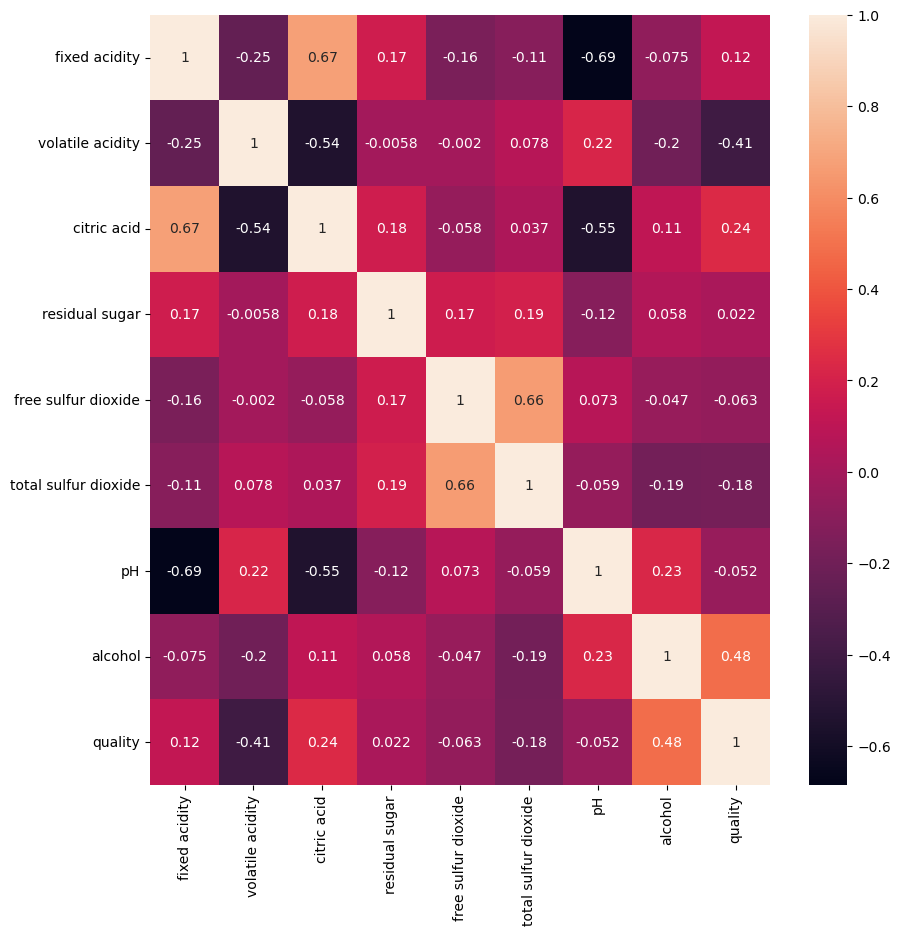

In [253]:
corr_matrix = df_ST.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

**Figure 9:** Heatmap of the domain-informed dataframe (df_ST) outlining correlations between the selected wine attributes

Additionally, we will examine the heatmap of the log-transformed dataframe (df_LT)

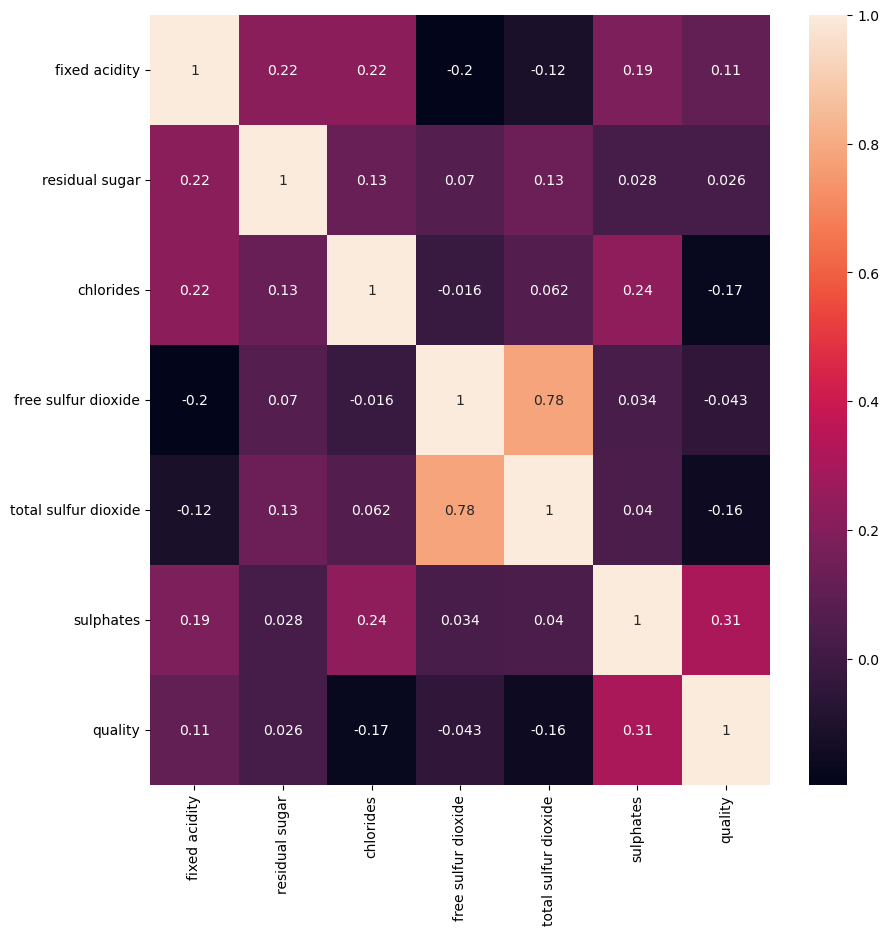

In [254]:
corr_matrix = df_LT.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

**Figure 10:** Heatmap of the log-transformed dataframe (df_LT) outlining the correlations between the selected wine attributes

Based on the heatmaps for both the domain-informed dataset (df_ST) and the log-transformed dataset (df_LT), the following wine attributes will be removed to prevent redundancy and reduced accuracy upon training the ML models (See discussion for further justificatons): 

- Citric Acid
- pH
- Total Sulfur Dioxide

In [255]:
# Revising the df_LT dataframe

wine_att_LT = ['fixed acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'sulphates', 'quality']

df_LT = df[wine_att_LT]

# Revising the df_ST dataframe

wine_att_ST = ['fixed acidity','volatile acidity','residual sugar','free sulfur dioxide','alcohol', 'quality']

df_ST = df[wine_att_ST]


After revision of the df_LT dataframe, the log-transformed attributes are as follows:
- Fixed Acidity
- Residual Sugar
- Chlorides
- Free Sulfur Dioxide
- Sulphates

Similarly, after revision of the df_ST dataframe, the domain-informed attributes are as follows:
- Fixed Acidity
- Volatile Acidity
- Residual Sugar
- Free Sulfur Dioxide
- Alcohol


# Model Selection

The following machine learning models will be trained and tested:

- Decision Trees 
- Random Forests 

# Model Training

In [257]:

# Preparing the domain-informed (ST) dataset

# Drop the quality column from the df_ST dataframe
X_ST = df_ST.drop('quality', axis=1)
# Set y to target variable
y_ST = df_ST['quality']

print(X_ST)
print(y_ST)
# Similarly prepare the log-transformed (LT) dataset

X_LT = df_LT.drop('quality', axis=1)
y_LT = df_LT['quality']

print(X_LT)
print(y_LT)

# Splitting ST dataset into 70% training and 30% testing sets

X_ST_train, X_ST_test, y_ST_train, y_ST_test = train_test_split(X_ST, y_ST, test_size=0.3, random_state=25)

# Splitting LT dataset into 70% training and 30% testing sets

X_LT_train, X_LT_test, y_LT_train, y_LT_test = train_test_split(X_LT, y_LT, test_size=0.3, random_state=25)

# Training the Decision Tree model with the ST dataset

DT_ST_model = DecisionTreeRegressor()
DT_ST_model.fit(X_ST_train, y_ST_train)

# Training the Decision Tree model with the LT dataset

DT_LT_model = DecisionTreeRegressor()
DT_LT_model.fit(X_LT_train, y_LT_train)

# Training the Random Forest model with the ST dataset

RF_ST_model = RandomForestRegressor()
RF_ST_model.fit(X_ST_train, y_ST_train)

# Training the Random Forest model with the LT dataset

RF_LT_model = RandomForestRegressor()
RF_LT_model.fit(X_LT_train, y_LT_train)


      fixed acidity  volatile acidity  residual sugar  free sulfur dioxide  \
0               7.4             0.700             1.9                 11.0   
1               7.8             0.880             2.6                 25.0   
2               7.8             0.760             2.3                 15.0   
3              11.2             0.280             1.9                 17.0   
4               7.4             0.700             1.9                 11.0   
...             ...               ...             ...                  ...   
1138            6.3             0.510             2.3                 29.0   
1139            6.8             0.620             1.9                 28.0   
1140            6.2             0.600             2.0                 32.0   
1141            5.9             0.550             2.2                 39.0   
1142            5.9             0.645             2.0                 32.0   

      alcohol  
0         9.4  
1         9.8  
2         9.8  

RandomForestRegressor()

# Model Evaluation

In [258]:
# Decision Tree Model Evaluation
print("Decision Tree: MAE + RMSE Evaluation Scores")

# Generating predictions for ST test dataset

DT_ST_predictions = DT_ST_model.predict(X_ST_test)

# Generating predictions for LT test dataset

DT_LT_predictions = DT_LT_model.predict(X_LT_test)

# Calculating Mean Absolute Error (MAE) for ST test dataset

DT_ST_mae = mean_absolute_error(y_ST_test, DT_ST_predictions)
print(f"MAE of ST data: {DT_ST_mae}")

# Calculating Mean Absolute Error (MAE) for LT test dataset

DT_LT_mae = mean_absolute_error(y_LT_test, DT_LT_predictions)
print(f"MAE of LT data: {DT_LT_mae}")

# Calculating Root Mean Square Error (RMSE) for ST test dataset

DT_ST_rmse = sqrt(mean_squared_error(y_ST_test, DT_ST_predictions))
print(f"RMSE of ST data: {DT_ST_rmse}")

# Calculating Root Mean Square Error (RMSE) for LT test dataset

DT_LT_rmse = sqrt(mean_squared_error(y_LT_test, DT_LT_predictions))
print(f"RMSE of LT data: {DT_LT_rmse}")

Decision Tree: MAE + RMSE Evaluation Scores
MAE of ST data: 0.5364431486880467
MAE of LT data: 0.6034985422740525
RMSE of ST data: 0.8364857768130284
RMSE of LT data: 0.9336595292814591


In [259]:
# Random Forest Model Evaluation
print("Random Forest: MAE + RMSE Evaluation Scores")
# Generating predictions for the ST test dataset

RF_ST_predictions = RF_ST_model.predict(X_ST_test)

# Generating predictions for the LT test dataset

RF_LT_predictions = RF_LT_model.predict(X_LT_test)

# Calculating Mean Absolute Error (MAE) for ST test dataset

RF_ST_mae = mean_absolute_error(y_ST_test, RF_ST_predictions)
print(f"MAE of ST data: {RF_ST_mae}")

# Calculating Mean Absolute Error (MAE) for LT test dataset

RF_LT_mae = mean_absolute_error(y_LT_test, RF_LT_predictions)
print(f"MAE of LT data: {RF_LT_mae}")

# Calculating Root Mean Square Error (RMSE) for ST dataset

RF_ST_rmse = sqrt(mean_squared_error(y_ST_test, RF_ST_predictions))
print(f"RMSE of ST data: {RF_ST_rmse}")

# Calculating Root Mean Square Error (RMSE) for LT dataset

RF_LT_rmse = sqrt(mean_squared_error(y_LT_test, RF_LT_predictions))
print(f"RMSE of LT data: {RF_LT_rmse}")


Random Forest: MAE + RMSE Evaluation Scores
MAE of ST data: 0.4414868804664722
MAE of LT data: 0.48723032069970845
RMSE of ST data: 0.6013655500453456
RMSE of LT data: 0.6495641059178017


In [260]:
# Creating a dataframe for the MAE and RMSE scores for both Decision Trees and Random Forests

Model_Scores = {
    'DT_MAE_ST': [0.5393586005830904],
    'DT_MAE_LT': [0.5714285714285714],
    'DT_RMSE_ST': [0.841697576624542],
    'DT_RMSE_LT': [0.9226656779965156],
    'RF_MAE_ST': [0.4402332361516035],
    'RF_MAE_LT': [0.48093294460641395],
    'RF_RMSE_ST': [0.60632477898345],
    'RF_RMSE_LT': [0.6463122569839572]
}

Models_df = pd.DataFrame(Model_Scores)


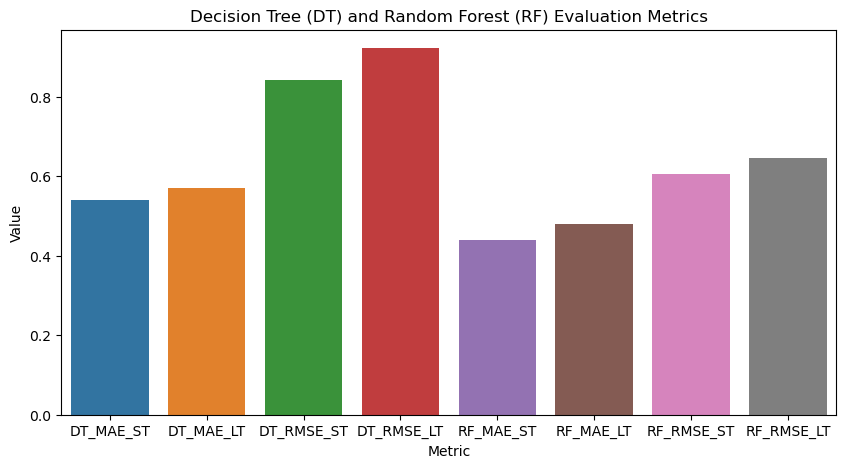

In [268]:
# Generating Bar Plot for each Decision Tree and Random Forest score

Models_long_df = Models_df.melt(var_name='Metric', value_name='Value')

plt.figure(figsize=(10,5))
plt.title("Decision Tree (DT) and Random Forest (RF) Evaluation Metrics")
sns.barplot(x='Metric', y='Value', data=Models_long_df)
plt.show()


**Figure 11:** Comparison of evaluation metrics (MAE, RMSE) between the DT and RF models using both log-transformed data (LT) and domain-informed data (ST) as inputs to each model during training and testing.

# Conclusion

Based on the MAE and RMSE scores for both the Decision Tree and Random Forest models, we can conclude the following:

- RMSE and MAE scores corresponding to Decision Trees (DT) show overall higher error scores compared to the Random Forest (RF) model.
- When both DT and RF models use log-transformed (LT) data for training, higher error scores are found compared to when both models are trained with the domain-informed data (ST).

Moreover, using Random Forest models with the attributes found from wine literature yield the lowest errors when evaluating both models together

# Discussion

Beginners to wine tasting may experience difficulty selecting wines of their preference due to the range of attributes that exist within a typical bottle. Various sources online such as blogs may contain information about quality wine attributes which can prove ambiguous without proper references to well-informed sources. This project aims to introduce readers to the process of setting up ML models as a tool to predict the quality of wine based on its attribtues. Simultaneously, relevant wine attributes are discussed from literature contaning insights into consumer preferences toward fine wines. 

The [Wine Quality Dataset](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset/data) from Kaggle was chosen for this project as it is a beginner-friendly dataset which is well-doccumented and contains clean data as evidenced by finding an absense of missing values and duplicate values during the data preprocessing phase. Machine Learning lessons from [Google](https://developers.google.com/machine-learning/data-prep/construct/collect/data-size-quality) emphasize that errors within a dataset such as omitted values and duplicates are examples of data which is unreliable for machine learning models.  During the process of **exploring the data**, it is important to note the number of observations and attributes that a dataset contains. An [AI blog](https://www.datarobot.com/blog/how-much-data-is-needed-to-train-a-good-model/) focusing on machine learning suggests for typical regression problems, ensuring the number of observations are 10x the number of attributes within the dataset. Following data exploration it was found from the Wine Quality Dataset that the number of observations was 1143 while the number of attributes was 13, moreover exceeding this guideline. 

While **pre-processing** the wine quality dataset, box plots were used to gain an initial idea of the presence outliers along with examining the interquartile range of each wine attribute against the quality score (Fig. 2). Histograms for each wine attribute (Fig. 3) were additionally generated to explicity view the skewness of each wine attribute. It was observed from both the box plots and the histograms that right skewness was present. It can be noted that the interquartile range was positioned close to the bottom whiskers within box plots generally indicating right-skewness throughout the wine attributes. A [review](https://www.scribbr.com/statistics/interquartile-range/) discussing the interpretation of box plots suggests that interquartile ranges positioned closer to lower values from a range of data are indicative of right-skewed distributions. To thoroughly assess the skewness of each wine attribute, the [skew function](https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de) from [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.skew.html) was used as a means to confirm that the visualizations were accurate. It was found from the skew function that the wine attributes corresponding to fixed acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, and sulphates highly followed right-skewness prompting the process of log-transformation in an attempt to correct the attributes to an approximately symmetrical distribution. The [Google](https://developers.google.com/machine-learning/data-prep/construct/collect/data-size-quality) Machine Learning lessons additionally note that minimizing the skew of data contributes towards improving the quality of data used by a machine learning model, further prompting the idea of applying log-transformation. After the right-skewed attributes were subject to log-transformation, a Shapiro-Wilk test in combination with Quantile-Quantile (Q-Q) plots (Fig. 6-8) were used as a formal asessment to determine whether the log-transformed data follows a normal distribution. It was found from the tests that each wine attribute does not follow a normal distribution. Notable improvement was observed from the Q-Q plots after log-transformation (Fig. 6-7), as the data aligned slightly more with the line of best-fit. A [review article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3693611/) focused on statistical normality tests emphasize that visual asessment alone is not a sufficient indicator of whether the attributes are normally distributed, moreover it was concluded from the Shapiro-Wilk test that each attribute does not follow a normal distribution. The article additionally states that Shapiro-Wilk tests are an advisable choice for evaluating whether data follows a normal distribution, furthermore justifying the choice of using this test.

During the **feature selection** process, results from wine literature based on consumer preferences toward fine wines were examined. The results of a wine tasting from [Coutinho *et. al.*](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7230440/) revealed that a specific fine wine, "Casa da Senra" - a *Vinho Verde* variety wine originating from Portugal - was ranked among the highest global evaluation scores during the study. Similarly, the study conducted by [Cortez *et. al.*](https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub) in which the Wine Quality Dataset originates uses *Vinho Verde* variety wine to develop the quality score described as the median evaluation score from three sensory assessors. From the Coutinho *et. al.* study, the Casa da Senra wine was described to have attributes such as medium to high acidity, a residual sugar content of less than 2 g/L, and 13% alcohol volume. Moreover, due to both studies containing the same variety of wine, it is justified to incorporate the notable attributes of the Casa da Senra wine into the domain-informed dataframe. Additionally a study conducted by [Maduerira et. al.](https://www.emerald.com/insight/content/doi/10.1108/17511061311317318/full/html) examining the role Portuguese wine attributes towards the involvement of consumers revealed that flavour and aroma positively influenced consumers in contrast to alcohol and gas content which had a negative influence on consumers. Under consideration of the literature discussed, the domain-informed dataset initially contained the fixed acidity, volatile acidity, citric acid, residual sugar, free sulfur dioxide, total sulfur dioxide, pH, and alcohol attributes. To examine the correlation between each attribute, heatmaps were generated for both the log-transformed (LT) and domain-informed (ST) datasets. Based on the heatmaps for the ST dataset (Fig. 9), citric acid, pH, and total sulfur dioxide attributes were responsible for high correlation values which can likely reduce the strength of the ML models under evaluation. Notable correlations found from the heatmap include citric acid and fixed acidity (0.67), total sulfur dioxide and free sulfur dioxide (0.66), along with pH and fixed acidity (-0.69). The heatmap for the LT dataset (Fig. 10) similarly indicated a notable correlation between free sulfur dioxide and total sulfur dioxide (0.78). A machine learning [blog](https://medium.com/@connor.anderson_42477/hot-or-not-heatmaps-and-correlation-matrix-plots-940088fa2806) focusing on the use of heatmaps for feature selection discusses that reducing the number of attributes that are highly correlated with eachother is a good practice towards strengthening machine learning models subject to training. Training machine learning models with highly correlated variables can increase the likelihood of inaccuracies. 

In consideration of the attributes containing high correlation values revealed by the heatmaps: citric acid, pH, and total sulfur dioxide were chosen to be removed from the ST dataset. The wine dataset from [Cortez *et. al.*](https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub) describes fixed acidity as grams of tartaric acid per cubic decimeter (dm<sup>3</sup>) which primarily contributes towards a property of wine known as astringency. Astringency describes when wine imparts a coarse and drying sensation to the mouth upon tasting. A study conducted by [Zhao *et. al.*](https://www.sciencedirect.com/science/article/abs/pii/S0308814622023470) focusing on the biochemical effects of tartaric acid on astringency found that astringency is enhanced when the concentration of tartaric acid was below 3.0 g/L within wine samples. Moreover, the properties of tartaric acid in wine are important to consider over the use of acetic acid. Additionally, pH is a property which broadly encompasses the other features found in wine explaining why negative correlation can be observed between pH and fixed acidity. An [article](https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too/) from Iowa State University describes that total sulfur dioxide in wine constitutes both the portion of free sulfur dioxide which readily evaporates plus the portion of sulfur dioxide which is bound to pigments and aldehydes. Additionaly it is noted to consider the content of free sulfur dioxide within wine, as too much of the gas can mask the presence of fruity aroma. Moreover, to account for the results of the [Maduerira et. al.](https://www.emerald.com/insight/content/doi/10.1108/17511061311317318/full/html) study which explain that aroma positively influences the involvement of Portuguese consumers, total sulfur dioxide was removed from the ML training data to reduce redundancy. In summary, the attribtues belonging to the revised ST dataset include: fixed acidity,
volatile acidity, residual sugar, free sulfur dioxide, and alcohol. Additionally the attributes belonging to the revised LT dataset include: fixed acidity, residual sugar, chlorides, free sulfur dioxide, and sulphates.

During the process of **model selection** the Decision Tree and Random Forest regression models were both chosen for this project. Decision Trees were initially chosen because they are flexible models which can accommodate for both regression and classification tasks. A machine learning [blog](https://www.simplilearn.com/regression-vs-classification-in-machine-learning-article) discussing the types of tasks commonly solved by ML describes that regression tasks involve the process of finding correlations between dependent and independent variables while classification tasks involve the categorization of data based on discrete or categorical variables. Another technical machine learning [blog](https://www.datasource.ai/en/data-science-articles/random-forests-for-complete-beginners) describes that decision trees are non-parametric models meaning that they do not heavily rely on assumptions about relationships within the data and makes less assumptions about how the data is distributed ([Differenes between Parametric vs Non-Parametric Models](https://vitalflux.com/difference-between-parametric-vs-non-parametric-models/)). Similar to decision trees, random forests are an ensemble machine learning method which average the results of multiple decision trees inot a stronger prediction result ([Random Forests for Beginners](https://www.datasource.ai/en/data-science-articles/random-forests-for-complete-beginners)). Overall, decision trees and random forests are suitable choices to use for this dataset due to the model's non-parametric attributes. Additionally, evaluating the performance between decision trees and random forests can directly demonstrate the effectiveness of ensemble methods within a machine learning model. Lastly, regression models are used for this project instead of classification models because the wine attributes used for analysis are continuous variables which are common for regression tasks, as suggested by a technical [blog](https://www.simplilearn.com/regression-vs-classification-in-machine-learning-article) discussing the use cases of regression models. The quality score from the Wine Quality Dataset is an ordinal scale from 1-10, but can be treated as a numeric output variable as there is equal spacing between the values. This practice is discussed in a statistical [blog](https://www.theanalysisfactor.com/pros-and-cons-of-treating-ordinal-variables-as-nominal-or-continuous/) discussing the treatment of ordinal variables. Moreover, it is justified to treat the quality score as a continuous variable suitable for use within regression models. 

The LT and ST datasets discussed earlier will be used to examine the effects of data transformation during **evaluation of both ML models**. The evaluation metrics that will be used are the Mean Absolute Error (MAE) and the Root Mean Squared Error (RMSE). According to an [article](https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e) discussing ML evaluation metrics, MAE can be described as the average of residuals from the dataset while RMSE is calculated the standard deviation of residuals from the dataset. It's important to note that residuals describe the difference between predicted values and observations within a regression model. The MAE and RMSE were both chosen for model evaluation because both scores are effective at describing the accuracy of the model where lower MAE and RMSE scores imply higher accuracy compared to other scores such as the *R<sup>2</sup>* value. An additional [article](https://thedatascientist.com/performance-measures-rmse-mae/) discussing both metrics describes that when using the RMSE score for evaluation, higher weight is given to larger errors as a result of squaring each residual; moreover, making this metric a highly stringent evaluation of model performance. Although MAE does not penalize errors to the same effect as the RMSE score, MAE still scales error linearly making this metric suitable for comparison with the RMSE score to acquire a general idea of model accuracy. 

Following model evaluation, it was found that the RMSE and MAE scores were lowest for the random forest model in contrast to the decision tree model. Additionally it was found that the domain-informed dataset yielded lower error scores compared to the log-transformed dataset after model training and testing. Because both the decision tree and random forest models are inherently non-parametric, the models were robust to the domain-informed data regardless of skewness. The results demonstrate that a careful selection of wine attributes containing minimal correlations notably contributes towards improved model performance. Additionally, the results followed the initial hypothesis which stated that the random forest model would yield the lowest RMSE and MAE scores, moreover providing sufficient evidence that the ensemble method behind random forests is capable of producing accurate predictions from the wine quality dataset. To improve the methodology in future ML projects using the wine quality dataset, the data-preprocessing stage could be revised to include additional statistical tests such as Analysis of Variance (ANOVA) since the only output variable in this dataset is the quality score. It would also be of interest to observe the outcome of treating the wine quality score as a purely categorical variable, applying methods such as the K-Nearest Neighbors (KNN) approach. During the methodology of the Cortez. *et. al.* study, independent sampling was not explicitly mentioned when discussing the approach of calculating the wine quality score. Moreover, if the quality score was found to be independently sampled then this could allow the use of parametric statistical tests during future iterations of data-preprocessing with this dataset. Parametric statistical tests generally assume that independent sampling has taken place, moreover prompting further investigation into the Cortez. *et. al.* study for future projects that aim to use this dataset. 